<a href="https://colab.research.google.com/github/t1p0kgod/DeepLearn/blob/main/work5/%D0%97%D0%BE%D0%BB%D0%BE%D1%82%D0%BA%D0%BE%D0%B2_5_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

## 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from io import BytesIO
from PIL import Image
from urllib.request import urlopen


model = keras.applications.DenseNet201()

model.summary() # Вывод краткого описания архитектуры созданной модели
model.get_config() # Вывод конфигурации созданной модели

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

82524592/82524592 [==============================] - 5s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

{'name': 'densenet201',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'ZeroPadding2D',
   'config': {'name': 'zero_padding2d',
    'trainable': True,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'name': 'zero_padding2d',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1/conv',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'cl

## 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [ ]:
urls = [
'https://images.unsplash.com/photo-1583496597467-d968d2fa33a8?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA==&auto=format&fit=crop&w=1771&q=80',
'https://images.unsplash.com/photo-1576842052285-eb317349a0a6?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1074&q=80',
'https://images.unsplash.com/photo-1505820013142-f86a3439c5b2?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1471&q=80',
'https://images.unsplash.com/photo-1536048810607-3dc7f86981cb?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=735&q=80',
'https://images.unsplash.com/photo-1612196808214-b8e1d6145a8c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=687&q=80'
]

images = []
def urlImage(index):
   req = urlopen(urls[index]) # используя метод urlopen, получаем объект запроса по ссылке (изображение)     
                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"
   image = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
   image = cv2.imdecode(image, -1) # декодируем изображение в привычный для отображения формат
   images.append(image)

for i in range(len(urls)): urlImage(i)

## 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС.

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [ ]:
converted = []
def imageConvert(images):
    for i in range(len(images)):
        image = images[i]
  
        image_rgb = cv2.resize(image , (224, 224, )) # Изменение разрешения изображения
        image_rgb  = image_rgb.astype("float") / 255.0
        image_rgb  = image_rgb .reshape(-1, 224, 224, 3)

        converted.append(image_rgb)
      

In [ ]:
imageConvert(images)

In [ ]:
np.shape(converted)

(5, 1, 224, 224, 3)

## 1.4. Напишите функцию, принимающую на вход список с представлениями обработаннах изображений (результат работы функции из п. 1.3.) и возвращающую список предсказанных нейросетью классов. 

In [ ]:

def predictImgCNN(model, images):
  fig, axs = plt.subplots(1, 5, figsize=(30, 4))
  for i in range(len(converted)):

      # загружаем входное изображение, меняем его размер на необходимый и выводим его
      img = converted[i]
      orig = img.reshape(224, 224, 3)

      prediction = model.predict(img)
      text = keras.applications.vgg16.decode_predictions(prediction, top=3)
      
      axs[i].set_title(i+1, fontsize = 30)
      axs[i].imshow(orig)
      axs[i].axis('off')
      print(f'Image {i+1}:{text}')
  plt.show()

## 1.5. Выведите изображения и соответствующие им классы, вызывая соответствующие функции

35363/35363 [==============================] - 0s 0us/step
Image 1:[[('n15075141', 'toilet_tissue', 0.7468433), ('n03887697', 'paper_towel', 0.2531544), ('n02786058', 'Band_Aid', 8.2759897e-07)]]
1/1 [==============================] - 0s 37ms/step
Image 2:[[('n10565667', 'scuba_diver', 0.8373986), ('n03888257', 'parachute', 0.033550195), ('n04228054', 'ski', 0.012053855)]]
1/1 [==============================] - 0s 39ms/step
Image 3:[[('n03637318', 'lampshade', 0.34475538), ('n04507155', 'umbrella', 0.33400276), ('n07734744', 'mushroom', 0.20943342)]]
1/1 [==============================] - 0s 37ms/step
Image 4:[[('n09468604', 'valley', 0.73338735), ('n09193705', 'alp', 0.081207424), ('n09246464', 'cliff', 0.037570905)]]
1/1 [==============================] - 0s 36ms/step
Image 5:[[('n04380533', 'table_lamp', 0.38374987), ('n04522168', 'vase', 0.17612818), ('n03637318', 'lampshade', 0.06731934)]]


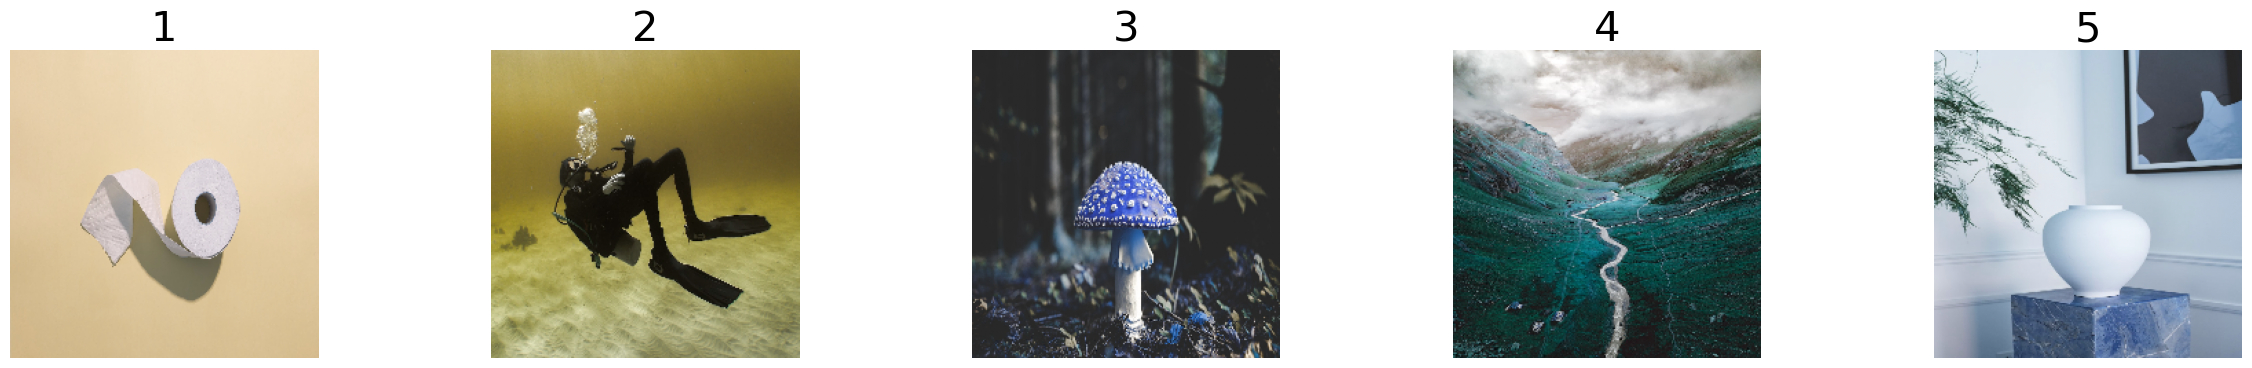

In [ ]:
predictImgCNN(model, converted)

# Задание 2. Использование обученной модели для работы со своим датасетом

## 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=3a070d6e70582d8def7b87f193bc562398787c31301c23bd9f982fcb12c16967
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import random
import pickle

import os

import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from io import BytesIO
from PIL import Image
from urllib.request import urlopen

base_model = keras.applications.DenseNet201( include_top=False, # убираем полносвязные слои
                   input_shape=(64,64,3), # меняем параметры входных данных на свои
                   pooling='avg', # значение параметра означает, что после последнего сверточного слоя будет применена операция среднего пулинга
                   weights='imagenet')

#base_model.summary() # Вывод краткого описания архитектуры созданной модели
# base_model.get_config() # Вывод конфигурации созданной модели

74836368/74836368 [==============================] - 4s 0us/step


## 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [ ]:
model_path = '/kaggle/input/dataset/CNN_model.h5'

images_path = '/kaggle/input/dataset/images_CNN.pickle'

label_path = '/kaggle/input/dataset/labels_CNN.pickle'

In [ ]:
saved_data = np.array(0)
saved_labels = []
with open(images_path,'rb') as f:
  saved_data = pickle.load(f)
with open(label_path,'rb') as f:
  saved_labels = pickle.load(f)

**ИЛИ**

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(saved_data, saved_labels, test_size=0.1, random_state=42)

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
trainX = np.array(trainX)/255.0
testX = np.array(testX)/255.0

labels = np.array(saved_labels)

In [ ]:
from keras.utils import to_categorical
# Создаем словарь для классификации предсказаний
classes = {'Radish': 0, 'Potato': 1,'Cucumber': 2}

# Классифицируем значения
y_train_num = np.array([classes[c] for c in trainY])
y_test_num = np.array([classes[c] for c in testY])

trainY = to_categorical(y_train_num,3)
testY = to_categorical(y_test_num,3)

In [ ]:
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)
print('Train: y = ', trainY.shape)
print('Test: y = ', testY.shape)

Train: X =  (2700, 64, 64, 3)
Test: X =  (300, 64, 64, 3)
Train: y =  (2700, 3)
Test: y =  (300, 3)


## 2.3. Создаем свою модель на основе DenseNet201

In [ ]:
# Создаем архитектуру сверточной нейронной сети
base_model.trainable = False # замораживаем все слои базовой модели

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow import keras

model = keras.Sequential([
    base_model,
    Dense(8, activation='relu'),
    Dense(3,  activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense (Dense)               (None, 8)                 15368     
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 18,337,379
Trainable params: 15,395
Non-trainable params: 18,321,984
_________________________________________________________________


In [ ]:
# Компилируем модель
from keras.optimizers import SGD
opt = SGD(learning_rate=0.0001)
model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## 2.4. Визуализация процесса обучения модели

In [ ]:
# Обучаем модель
his = model.fit(trainX, trainY, batch_size=20, epochs=80, validation_split=0.2)

Epoch 1/80
108/108 [==============================] - 19s 61ms/step - loss: 1.3771 - accuracy: 0.3981 - val_loss: 1.0154 - val_accuracy: 0.5407
Epoch 2/80
108/108 [==============================] - 4s 36ms/step - loss: 0.7845 - accuracy: 0.6509 - val_loss: 0.6897 - val_accuracy: 0.6963
Epoch 3/80
108/108 [==============================] - 3s 29ms/step - loss: 0.5774 - accuracy: 0.7602 - val_loss: 0.5432 - val_accuracy: 0.7926
Epoch 4/80
108/108 [==============================] - 3s 32ms/step - loss: 0.4694 - accuracy: 0.8241 - val_loss: 0.4552 - val_accuracy: 0.8315
Epoch 5/80
108/108 [==============================] - 3s 29ms/step - loss: 0.4006 - accuracy: 0.8630 - val_loss: 0.3978 - val_accuracy: 0.8667
Epoch 6/80
108/108 [==============================] - 3s 30ms/step - loss: 0.3529 - accuracy: 0.8861 - val_loss: 0.3566 - val_accuracy: 0.8907
Epoch 7/80
108/108 [==============================] - 3s 29ms/step - loss: 0.3177 - accuracy: 0.8958 - val_loss: 0.3255 - val_accuracy: 0.907

10/10 [==============================] - 7s 217ms/step - loss: 0.0782 - accuracy: 0.9833


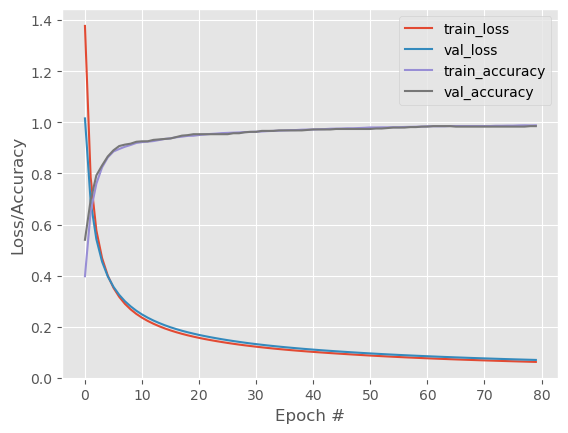

In [ ]:
  model.evaluate(testX, testY)

  plt.style.use("ggplot")
  plt.figure()
  plt.plot( his.history["loss"], label="train_loss")
  plt.plot( his.history["val_loss"], label="val_loss")
  plt.plot( his.history["accuracy"], label="train_accuracy")
  plt.plot( his.history["val_accuracy"], label="val_accuracy")
  plt.title(f"")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

In [ ]:
model.save("Imagenet_model", save_format="h5")

## 2.5. Подготовьте набор проверочных данных см. Задание №1 (п. 1.2, 1.3, 1.4)

In [ ]:
urls = [
'https://images.unsplash.com/photo-1587411768638-ec71f8e33b78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=880&q=80',
'https://images.unsplash.com/photo-1617130094141-532436117aa1?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=880&q=80',
'https://images.unsplash.com/photo-1568584711271-6c929fb49b60?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1472&q=80',
'https://images.unsplash.com/photo-1593026122758-19bebc625104?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1470&q=80',
'https://images.unsplash.com/photo-1531170887152-6b21ba4ce8ae?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1470&q=80'
]

images = []
def urlImage(index):
   req = urlopen(urls[index]) # используя метод urlopen, получаем объект запроса по ссылке (изображение)     
                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"
   image = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
   image = cv2.imdecode(image, -1) # декодируем изображение в привычный для отображения формат
   images.append(image)

for i in range(len(urls)): urlImage(i)

In [ ]:
np.shape(images)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(5,)

<function matplotlib.pyplot.show(close=None, block=None)>

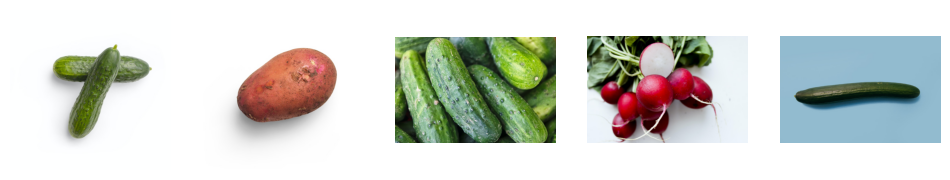

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(12, 4))
for i in range(len(images)):
  img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
  axs[i].imshow(img)
  axs[i].axis('off')
plt.show

In [ ]:
converted = []
def imageConvert(images):
    for i in range(len(images)):
        image = images[i]
  
        image_rgb = cv2.resize(image , (64, 64, )) # Изменение разрешения изображения
        image_rgb  = image_rgb.astype("float") / 255.0
        image_rgb  = image_rgb .reshape(-1, 64, 64, 3)

        converted.append(image_rgb)
imageConvert(images)

In [ ]:
np.shape(converted)

(5, 1, 64, 64, 3)

In [ ]:
 base_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 70, 70, 3)   0           ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']   

## 2.6. Организуйте вывод изображений и соответствующих им классов

1/1 [==============================] - 0s 40ms/step
[[0.3681594  0.30054238 0.33129823]]
Image 1:  Radish
1/1 [==============================] - 0s 38ms/step
[[0.06830902 0.8819867  0.04970426]]
Image 2:  Potato
1/1 [==============================] - 0s 41ms/step
[[3.6973166e-01 1.2266581e-05 6.3025606e-01]]
Image 3:  Cucumber
1/1 [==============================] - 0s 39ms/step
[[0.63903815 0.02159951 0.33936235]]
Image 4:  Radish
1/1 [==============================] - 0s 41ms/step
[[0.49910754 0.33847404 0.16241851]]
Image 5:  Radish


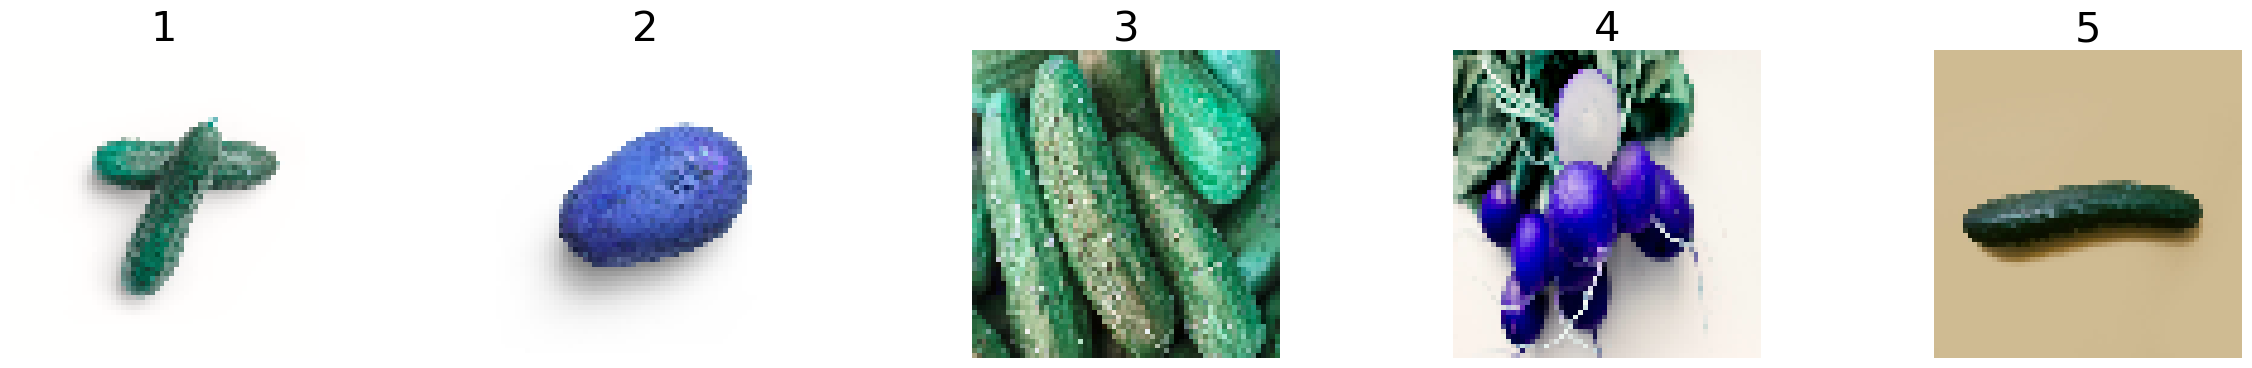

In [ ]:
classes = {'Radish': 0, 'Potato': 1,'Cucumber': 2}
classes = ['Radish', 'Potato','Cucumber']
def predictImg(model, images):
  fig, axs = plt.subplots(1, 5, figsize=(30, 4))
  for i in range(len(converted)):

      # загружаем входное изображение, меняем его размер на необходимый и выводим его
      img = converted[i]
      orig = img.reshape(64,64,3)

      prediction = model.predict(img)
      text = classes[(np.argmax(prediction))] # Вывод номера класса объекта
      
      axs[i].set_title(i+1, fontsize = 30)
      axs[i].imshow(orig)
      axs[i].axis('off')
      print(prediction)
      print(f'Image {i+1}:  {text}')
      
  plt.show()
predictImg(model, converted)